In [1]:
!pip install yfinance pandas requests beautifulsoup4 plotly


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 84.3 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=a0825dbde5d4af58879d92fb0856121926cc0c71798f5952938631be351b95a2
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_x86_64.whl size=303891 sha256=90b22a39f593cf65f4c0046c4f60051e871b90434f841b6d3723b28833b1a17a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/e2/48/

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go



In [3]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
!pip install requests beautifulsoup4 lxml pandas html5lib

import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Fetch Tesla Revenue Page
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url_tesla).text

# Step 2: Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables
tables = pd.read_html(html_data)


tesla_revenue = tables[1]  # If this gives wrong data, try tables[2]

# Step 5: Clean and process
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$':'', ',':''}, regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Step 6: Display last 5 rows
print("✅ Tesla Quarterly Revenue Data (Cleaned):")
tesla_revenue.tail()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 66.1 MB/s eta 0:00:00


/tmp/ipykernel_865/2514569231.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [9]:
!pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup

# Get Tesla revenue data from Macrotrends
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url_tesla).text
soup = BeautifulSoup(html_data, "html.parser")

# Extract the revenue table
tables = soup.find_all("table")
for table in tables:
    if "Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Clean the dataframe
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"\$|,", "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display last 5 rows
tesla_revenue.tail()


AttributeError: 'NoneType' object has no attribute 'columns'

In [10]:
!pip install requests beautifulsoup4 lxml pandas html5lib

import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Fetch Tesla Revenue Page
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url_tesla).text

# Step 2: Use pandas to extract all tables directly
tables = pd.read_html(html_data)

# Step 3: Check how many tables are found (optional, just to confirm)
print(f"✅ Found {len(tables)} tables")

# Step 4: Identify which one is the revenue table
for i, table in enumerate(tables):
    print(f"\n--- Table {i} ---")
    print(table.head())
    # Stop once you find the one containing "Revenue" or "Date"

# Step 5: Once you identify the correct table (usually index 1 or 2), use it:
tesla_revenue = tables[1]  # change index if necessary (try 2 if 1 doesn’t look right)

# Step 6: Clean the dataframe
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$':'', ',':''}, regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Step 7: Display the last 5 rows
print("\n✅ Tesla Revenue Data (last 5 rows):")
print(tesla_revenue.tail())


/tmp/ipykernel_865/776229017.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [11]:
import pandas as pd
import requests

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url_tesla)

if response.status_code == 200:
    html_data = response.text
    tables = pd.read_html(html_data)
    print(f"✅ Found {len(tables)} tables")

    for i, table in enumerate(tables):
        print(f"\n--- Table {i} ---")
        print(table.head())

    # Adjust the index if necessary
    tesla_revenue = tables[1]
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$':'', ',':''}, regex=True)
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

    print("\n✅ Tesla Revenue Data:")
    print(tesla_revenue.tail())
else:
    print("Failed to retrieve the webpage")

Failed to retrieve the webpage


In [12]:
import pandas as pd
import requests

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url_tesla, headers=headers)

if response.status_code == 200:
    html_data = response.text
    tables = pd.read_html(html_data)
    print(f"✅ Found {len(tables)} tables")

    for i, table in enumerate(tables):
        print(f"\n--- Table {i} ---")
        print(table.head())

    tesla_revenue = tables[1]
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$':'', ',':''}, regex=True)
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

    print("\n✅ Tesla Revenue Data:")
    print(tesla_revenue.tail())
else:
    print(f"Failed to retrieve the webpage, status code: {response.status_code}")

✅ Found 1 tables

--- Table 0 ---
             Related Stocks           
               Company Name Market Cap
0       General Motors (GM)       $66B
1            Ford Motor (F)     $52.6B
2             PACCAR (PCAR)     $51.8B
3  Rivian Automotive (RIVN)     $18.5B
4        VinFast Auto (VFS)        $8B


/tmp/ipykernel_865/3398630727.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


IndexError: list index out of range

In [1]:
gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()


NameError: name 'yf' is not defined

In [2]:
!pip install yfinance pandas requests beautifulsoup4 plotly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 127.1 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 197.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 186.0 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=5bafcc8585e42fdd60b91a24152081d1fa99136b8f4d4a7ff68e7689e75a7152
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_x86_64.whl size=303891 sha256=56516dfca7595113877894400e2e327c5fe826b8c10f05818ac1973093097c14
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/e2/48

In [3]:

gme = yf.Ticker("GME")

# Get historical data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()


NameError: name 'yf' is not defined

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

gme = yf.Ticker("GME")

# Get historical data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [6]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_data_gme, "html.parser")

# Extract the revenue table
tables_gme = soup_gme.find_all("table")
for table in tables_gme:
    if "Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break

# Clean the dataframe
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$|,", "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display last 5 rows
gme_revenue.tail()


NameError: name 'gme_revenue' is not defined

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url_gme)

if response.status_code == 200:
    html_data_gme = response.text
    soup_gme = BeautifulSoup(html_data_gme, "html.parser")

    # Extract all tables
    tables_gme = soup_gme.find_all("table")

    gme_revenue = None
    for table in tables_gme:
        if "Quarterly Revenue" in str(table):
            gme_revenue = pd.read_html(str(table))[0]
            break

    if gme_revenue is not None:
        # Clean the dataframe
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$|,", "", regex=True)
        gme_revenue.dropna(inplace=True)
        gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

        # Display last 5 rows
        display(gme_revenue.tail())
    else:
        print("Could not find the 'Quarterly Revenue' table on the page.")
else:
    print(f"Failed to retrieve data, status code: {response.status_code}")

Failed to retrieve data, status code: 403


In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Set URL and Headers to mimic a browser
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

# Step 2: Request the page with headers
response = requests.get(url_gme, headers=headers)

if response.status_code == 200:
    html_data = response.text
    
    # Step 3: Use pandas to extract all tables
    tables = pd.read_html(html_data)
    print(f"✅ Found {len(tables)} tables")

    # Step 4: Identify which table has Date and Revenue
    for i, table in enumerate(tables):
        print(f"\n--- Table {i} ---")
        print(table.head())
    
    # Step 5: Once identified (usually table 1 or 2), assign it
    gme_revenue = tables[1]  # change index if needed (try 2 if not correct)

    # Step 6: Clean the dataframe
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

    # Step 7: Display last 5 rows
    print("\n✅ GameStop Revenue Data (last 5 rows):")
    display(gme_revenue.tail())
else:
    print(f"❌ Failed to retrieve data. Status code: {response.status_code}")


/tmp/ipykernel_327/1474729740.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


ImportError: Missing optional dependency 'lxml'.  Use pip or conda to install lxml.

In [9]:
pip install lxml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 142.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Set URL and Headers to mimic a browser
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

# Step 2: Request the page with headers
response = requests.get(url_gme, headers=headers)

if response.status_code == 200:
    html_data = response.text
    
    # Step 3: Use pandas to extract all tables
    tables = pd.read_html(html_data)
    print(f"✅ Found {len(tables)} tables")

    # Step 4: Identify which table has Date and Revenue
    for i, table in enumerate(tables):
        print(f"\n--- Table {i} ---")
        print(table.head())
    
    # Step 5: Once identified (usually table 1 or 2), assign it
    gme_revenue = tables[1]  # change index if needed (try 2 if not correct)

    # Step 6: Clean the dataframe
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

    # Step 7: Display last 5 rows
    print("\n✅ GameStop Revenue Data (last 5 rows):")
    display(gme_revenue.tail())
else:
    print(f"❌ Failed to retrieve data. Status code: {response.status_code}")


✅ Found 6 tables

--- Table 0 ---
   GameStop Annual Revenue (Millions of US $)  \
0                                        2025   
1                                        2024   
2                                        2023   
3                                        2022   
4                                        2021   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $3,823  
1                                       $5,273  
2                                       $5,927  
3                                       $6,011  
4                                       $5,090  

--- Table 1 ---
  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2025-07-31   
1                                    2025-04-30   
2                                    2025-01-31   
3                                    2024-10-31   
4                                    2024-07-31   

  GameStop Quarterly Revenue (Millions of US $).1  
0

/tmp/ipykernel_327/1474729740.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


,Date,Revenue
54,2012-01-31,3579
55,2011-10-31,1947
56,2011-07-31,1744
57,2011-04-30,2281
58,2011-01-31,3693


In [11]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f"{stock_name} Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"{stock_name} Stock Price Over Time")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label=f"{stock_name} Revenue", color='orange')
    plt.xlabel("Date")
    plt.ylabel("Revenue (in USD)")
    plt.title(f"{stock_name} Revenue Over Time")
    plt.legend()
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla")


ModuleNotFoundError: No module named 'matplotlib'

In [13]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 162.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 132.6 MB/s eta 0:00:00


In [14]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f"{stock_name} Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"{stock_name} Stock Price Over Time")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label=f"{stock_name} Revenue", color='orange')
    plt.xlabel("Date")
    plt.ylabel("Revenue (in USD)")
    plt.title(f"{stock_name} Revenue Over Time")
    plt.legend()
    plt.show()
make_graph(tesla_data, tesla_revenue, "Tesla")


NameError: name 'tesla_data' is not defined

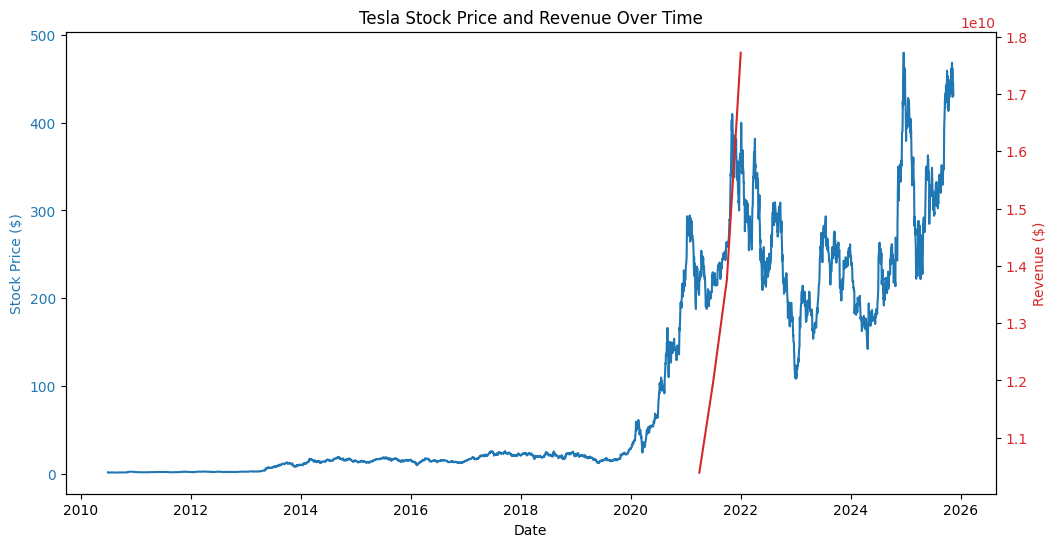

In [15]:
# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Download Tesla stock price data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Step 4: Prepare Tesla revenue data (sample data, replace with actual if available)
tesla_revenue = pd.DataFrame({
    "Date": ["2021-03-31", "2021-06-30", "2021-09-30", "2021-12-31"],
    "Revenue": ["10,389,000,000", "11,958,000,000", "13,757,000,000", "17,719,000,000"]
})

# Clean revenue data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").astype(float)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Step 5: Define the plotting function
def make_graph(stock_data, revenue_data, company_name):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue ($)', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'{company_name} Stock Price and Revenue Over Time')
    plt.show()

# Step 6: Call the function to display the graph
make_graph(tesla_data, tesla_revenue, "Tesla")

AttributeError: 'America/New_York' object has no attribute 'update'

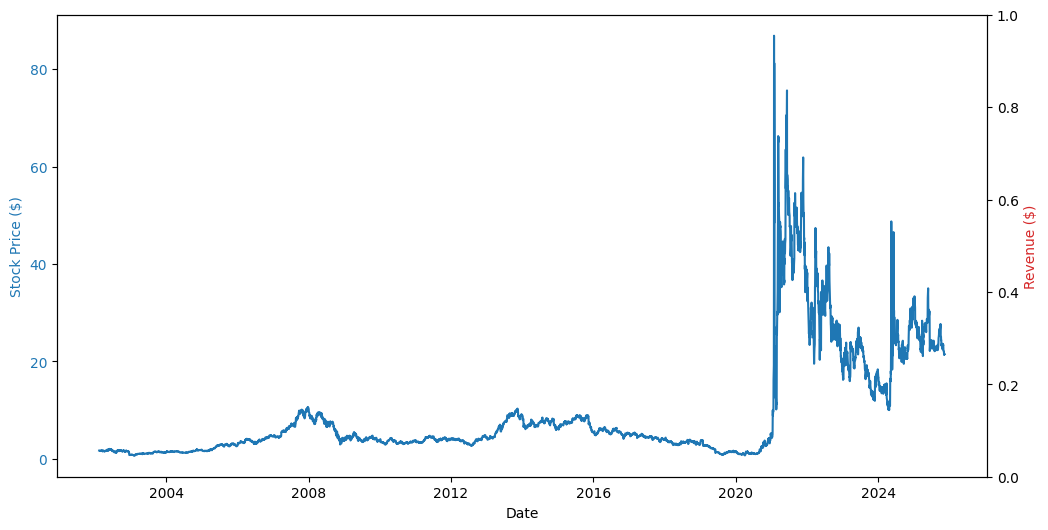

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Download Tesla stock price data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Step 4: Prepare Tesla revenue data (sample data, replace with actual if available)
tesla_revenue = pd.DataFrame({
    "Date": ["2021-03-31", "2021-06-30", "2021-09-30", "2021-12-31"],
    "Revenue": ["10,389,000,000", "11,958,000,000", "13,757,000,000", "17,719,000,000"]
})

# Clean revenue data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").astype(float)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Step 5: Define the plotting function
def make_graph(stock_data, revenue_data, company_name):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue ($)', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'{company_name} Stock Price and Revenue Over Time')
    plt.show()

make_graph(gme_data, gme_revenue, "GameStop")
